#Data Clustering

Exploring data is mainly about developing an understanding for the kind of questions that the data can answer. In order to find out about what kind of conclusions one can draw from the data one needs to identify statistical patterns in the data. There are no fast given rules of how to best proceed and success is mainly based on building up an intuition for the different techniques that are suitable in each case from working on own datasets.

We continue to use the Life expectancy data set in this tutorial as prepared under the previous tutorial. The obvious question one can ask regarding the life expectancy is regarding the different factors that relate or possibly result in higher life expectancy or in a wide variation of life expectancy among different countries and regions in the world. 
Another possibility offered by the data set is to focus on the question regarding the difference between 'developing' and 'developed' countries.

The aim of this project is to examplify the methods regarding the clustering of data. As teh name already indicares, clustering of data is mainly used to visualize clusters, e.g. groups within the data that share similar properties. This clustering is entirely based on statistics and does not need to have any meaning in the real world. But it can highlight common properties inherent in the data that otherwise is not visible.

The content in this tutorial is organized as follows:

- 1. Importing the resulting data frame variables from previous tutorial

- 2. Clustering
  - 2.1 Identifying 2 Clusters
    - 2.1.1 K-means method
    - 2.1.2 Comparison between clustering and classification into developing and developed countries
  - 2.2 Identifying the optimal number of clusters
    - 2.2.1 Identifying 3 clusters
    - 2.2.2 Comparing clustering with all of the variables
    - 2.2.3 Plotting the scatterplots of all of the significant single values
- 3 Dimensionality reduction 
  - 3.1 Scatterplot of reduced dimensions
  - 3.2 Identifying countries



Appreciation and thanks for inspirations are due to the following people and their contributions:
- Philip Bowman for his excellent Kaggle-notbook on 'Life Expectancy: Exploratory Data Analysis', see: https://www.kaggle.com/kumarajarshi/life-expectancy-who
- Harshini Gadige for her Kaggle-notebook on 'Life Expectancy Cleaning,EDA,Feature Engineering', see: https://www.kaggle.com/harshini564/life-expectancy-cleaning-eda-feature-engineering
- Magnus Vilhelm Persson & Luiz Felipe Martins, 'Mastering Python Data Analysis', Birmingham, UK, Packt Publishing, 2016.

### done by Ladan Farbiz ladanfarbiz@yahoo.com

In [1]:
# Import all libraries needed for this tutorial

# Pandas: used to create and work with DataFrames
import pandas as pd #imports all of pandas library
from pandas import DataFrame, read_csv #imports some of the important functions from the pandas library.


# Matplotlib: used for data visualization/plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
# Enable inline plotting, allows the plots to be seen in the notebook and stored with the document
%matplotlib inline

# numpy
import numpy as np

# seaborn: used for heatmaps and other statistical plots
import seaborn as sns #might require installation with: conda install -c anaconda seaborn

# Importing statistical function for t-test from scipy
import scipy.stats as stats

# import KMeans
from sklearn.cluster import KMeans
# import nearest neighbors
#from sklearn.neighbors import NearestNeighbors

# import from sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Saving variables as files on disk
import pickle

import warnings
warnings.filterwarnings("ignore") #some warnings are supressed


### Section defining File Paths - e.g. the path to your files, either on Colab or on your own computer
inputFilePath='/drive/My Drive/Colab Notebooks/MA661E/'  #'' 
outputFilePath='/drive/My Drive/Colab Notebooks/MA661E/'  #''
# mounting google drive if working in Colab - if not working on Colab do comment-out the following two rows
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## 1. Importing the resulting data frame variables from previous tutorial
In the last tutorial we prepared the data and handled missing values. This data will be read by 'unpickling' the variable saved as file.


In [2]:
#Unpickling the variable from the file with the name "LifeExpectancy-dfLE.pickle" from last tutorial
d_in = open(outputFilePath+"LifeExpectancy-dfLE.pickle","rb") # "rb" defines the reading mode for the file
[dfLE] = pickle.load(d_in)
d_in.close() # never forget to close an open file!
#Make sure that you got some data by printing the first three rows
dfLE.head(3)

,Country,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
16,Albania,2015,0,77.8,74,0,4.60,364.975229,99.0,0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,1
17,Albania,2014,0,77.5,8,0,4.51,428.749067,98.0,1,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,1
18,Albania,2013,0,77.2,84,0,4.76,430.876979,99.0,1,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,1


## 2. Clustering

The purpose of clustering is to find new insights about the data in form of patterns or common characteristics. Groups or clusters are identified based on the distances of the data points to one another and/ or on their density.

An example of a problem formulation for clustering, given our data on life-expectancies, could be:
- If the data is being clustered in two groups, how well do these clusters coincide with the labels 'Developed' and 'Developing'? 
- Which are the clusters in the data-set and what is the number of 'optimal' clustering?
- How does the 'optimal' clustering correspond to the values of life-expectancy?
- Which countries belong to the same clusters?


The available clustering methods require the number of clusters to be identified as arguments. We start out by looking att the clustering of 2 groups.

#### Preparation of the data set
We will use the latest version of the data but will aggregate by country using the mean-values over the diferent years per country. We will also use the country names as index.

In [3]:
#Example: aggregation by group 'Country' with mean-values
dfLEA=dfLE.groupby(['Country']).mean()
dfLEA.head(3)

,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
Country,,,,,,,,,,,,,,,,,,,
Albania,2007.5,0.0,75.156250,45.062500,0.687500,4.84875,193.259091,98.000000,0.9375,5.945625,98.062500,0.1,2119.726679,6.969116e+05,1.618750,1.700000,0.709875,12.1375,1.0
Algeria,2005.5,0.0,72.983333,113.833333,19.833333,0.42500,184.899824,45.833333,23.0000,4.041667,90.333333,0.1,2161.154005,2.798987e+06,6.133333,6.016667,0.680167,12.0500,2.0
Argentina,2004.5,0.0,74.662500,132.250000,11.000000,7.94000,859.803036,51.375000,12.3750,7.822500,90.500000,0.1,5185.838400,3.493547e+06,1.125000,0.975000,0.779625,16.0625,4.0


In [4]:
dfLEA.shape

(87, 19)

Since the variables have very different scales, we will need to normalize the scaling in order to prevent that some variables dominate too much.

### 5.1 Identifying 2 Clusters
We start by identifying 2 clusters, wondering how they coincide with the labels 'Developed' and 'Developing'.
To make sure that the variable 'Developed' cannot influence the clustering, we will remove this column first.

In [5]:
# Removing the column 'Developed' from the data to be clustered
dfCluster2=dfLEA.copy()
dfCluster2=dfCluster2.drop(columns='Developed')
dfCluster2.head(3)

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
Country,,,,,,,,,,,,,,,,,,
Albania,2007.5,75.156250,45.062500,0.687500,4.84875,193.259091,98.000000,0.9375,5.945625,98.062500,0.1,2119.726679,6.969116e+05,1.618750,1.700000,0.709875,12.1375,1.0
Algeria,2005.5,72.983333,113.833333,19.833333,0.42500,184.899824,45.833333,23.0000,4.041667,90.333333,0.1,2161.154005,2.798987e+06,6.133333,6.016667,0.680167,12.0500,2.0
Argentina,2004.5,74.662500,132.250000,11.000000,7.94000,859.803036,51.375000,12.3750,7.822500,90.500000,0.1,5185.838400,3.493547e+06,1.125000,0.975000,0.779625,16.0625,4.0


In [6]:
# Standard-scaling, which turns dataframes into numpy.ndarrays were they need to be transformed back into dataframes
sc=StandardScaler()
dfCluster2sc=sc.fit_transform(dfCluster2)
dfCluster2=DataFrame(dfCluster2sc, index=dfCluster2.index, columns=dfCluster2.columns)
dfCluster2.head(3)

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
Country,,,,,,,,,,,,,,,,,,
Albania,-0.136939,0.130184,-1.251941,-0.526934,-0.272723,-0.587983,0.854792,-0.513511,-0.227633,0.894685,-0.503594,-0.419778,-0.701344,-0.432905,-0.369261,-0.234531,-0.618252,-1.756147
Algeria,-0.904503,-0.257864,-0.041058,2.125304,-1.402063,-0.622528,-0.742202,1.999444,-1.290213,-0.247106,-0.503594,-0.393560,0.390321,2.271264,2.213160,-0.496510,-0.656153,-1.731603
Argentina,-1.288285,0.042009,0.283214,0.901638,0.516442,2.166606,-0.572553,0.789239,0.819832,-0.222485,-0.503594,1.520673,0.751025,-0.728654,-0.802989,0.380549,1.081898,-1.682515


#### 2.1.1 K-means method
We are using the k-means method from scikit-learn for clustering.

In [7]:
#Example: create kmeans object with 2 clusters
kmeans_2f = KMeans(n_clusters=2)

# fit kmeans model with dfCluster2 data
kmeans_2f.fit(dfCluster2)

# save the location of the centers of the clusters learned by kmeans object
center_2f=kmeans_2f.cluster_centers_

# save the labels of the clusters as DataFrame, using same index as in dfCluster2
y_2f = DataFrame(kmeans_2f.labels_, index=dfCluster2.index)

In [8]:
# Add the cluster-numbers to a column 'Cluster2' in dfLEA
dfLEA['Cluster2']=y_2f
dfLEA.head(2)

,Year,Developed,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr,Cluster2
Country,,,,,,,,,,,,,,,,,,,,
Albania,2007.5,0.0,75.156250,45.062500,0.687500,4.84875,193.259091,98.000000,0.9375,5.945625,98.062500,0.1,2119.726679,6.969116e+05,1.618750,1.700000,0.709875,12.1375,1.0,0
Algeria,2005.5,0.0,72.983333,113.833333,19.833333,0.42500,184.899824,45.833333,23.0000,4.041667,90.333333,0.1,2161.154005,2.798987e+06,6.133333,6.016667,0.680167,12.0500,2.0,1


### 2.2 Identifying the optimal number of clusters
There is usually no automatic way of finding the optimal number of clusters in a data set. However, one can measure the 'initertia' of the clusters in order to estimate the best choice for the number of clusters. Inertia' is originally a physical characteristics of moving masses. The more condensed and heavier a mass, the more inertia it has when it is being accelerated. If there is just one cluster, all the samples will be part of the cluster and its 'mass' will be large with a high 'inertia'. If each sample forms an own cluster, the clusters will have light 'masses' and low 'inertia'. The 'ellbow' or 'knee' function calculates the inertia for different number of clusters. The optimal number of clusters is the one at the 'ellbow' or 'knee'- the maximum number of clusters with a high intertia before the intertia drops.

We want to see if there is a matching between the optimal number of clusters and the values for life expectancy. To make sure that our variable 'Life_expectancy' does not influence the actual clustering, we will remove this column from the data set before clustering

In [12]:
# Resetting the variable dfLEA to original aggregated variable without cluster2-information
dfLEA=dfLE.groupby(['Country']).mean()
# Removing the column 'Life_expectancy' from the data to be clustered
dfClusterN=dfLEA.copy()
dfClusterN=dfClusterN.drop(columns='Life_expectancy')
dfClusterN.head(3)

,Year,Developed,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
Country,,,,,,,,,,,,,,,,,,
Albania,2007.5,0.0,45.062500,0.687500,4.84875,193.259091,98.000000,0.9375,5.945625,98.062500,0.1,2119.726679,6.969116e+05,1.618750,1.700000,0.709875,12.1375,1.0
Algeria,2005.5,0.0,113.833333,19.833333,0.42500,184.899824,45.833333,23.0000,4.041667,90.333333,0.1,2161.154005,2.798987e+06,6.133333,6.016667,0.680167,12.0500,2.0
Argentina,2004.5,0.0,132.250000,11.000000,7.94000,859.803036,51.375000,12.3750,7.822500,90.500000,0.1,5185.838400,3.493547e+06,1.125000,0.975000,0.779625,16.0625,4.0


In [13]:
# Standard-scaling, just like before
sc=StandardScaler()
dfClusterNsc=sc.fit_transform(dfClusterN)
dfClusterN=DataFrame(dfClusterNsc, index=dfClusterN.index, columns=dfClusterN.columns)
dfClusterN.head(3)

,Year,Developed,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling,Country_Nr
Country,,,,,,,,,,,,,,,,,,
Albania,-0.136939,-0.725476,-1.251941,-0.526934,-0.272723,-0.587983,0.854792,-0.513511,-0.227633,0.894685,-0.503594,-0.419778,-0.701344,-0.432905,-0.369261,-0.234531,-0.618252,-1.756147
Algeria,-0.904503,-0.725476,-0.041058,2.125304,-1.402063,-0.622528,-0.742202,1.999444,-1.290213,-0.247106,-0.503594,-0.393560,0.390321,2.271264,2.213160,-0.496510,-0.656153,-1.731603
Argentina,-1.288285,-0.725476,0.283214,0.901638,0.516442,2.166606,-0.572553,0.789239,0.819832,-0.222485,-0.503594,1.520673,0.751025,-0.728654,-0.802989,0.380549,1.081898,-1.682515


In [14]:
# The following code defines first some parameters and then iterates in a for loop where the data is
# clustered from 1 to 15 clusters. The inertia value is added to the SSE-array, one for each clustering
# SSE stands for 'Sum of Squared Errors', see: https://hlab.stanford.edu/brian/error_sum_of_squares.html

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dfClusterN)
    sse.append(kmeans.inertia_)

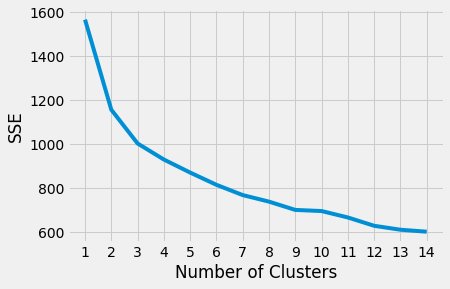

In [15]:
# Plots the value for SSE found
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Discussion of the results:

- The figure shows that there are what could be interpreted as 'ellbow'-points att n=2 and n=3.

#### 2.2.1 Identifying 3 clusters
- We use the same code as before but for 3 clusters instead of 2.

In [16]:
# create kmeans object with 3 clusters
kmeans_3f = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=42)

# fit kmeans object to data
kmeans_3f.fit(dfClusterN)

# save the location of the centers of the clusters learned by kmeans object
center_3f=kmeans_3f.cluster_centers_

# save Labels of each point
y_3f = DataFrame(kmeans_3f.labels_, index=dfClusterN.index)

# Adding the labels to the overview table
dfLEA['Cluster3']=y_3f
y_3f.value_counts()

2    42
1    31
0    14
dtype: int64

Discussion of the result:
- The three clusters have different numbers of data points
- If there is a matching with life-expectancy than there should be a clear distinction of the values for life expectancy of the countries between these clusters.

We can use seaborn's catplot to verify this.

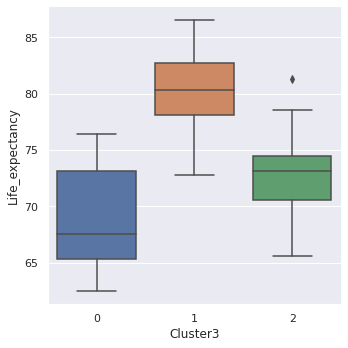

In [17]:
#Example: Comparing the distributions for life expectancy based on clustering
sns.set_theme() #reset to default
#'fivethirtyeight'
sns.catplot(data=dfLEA,x="Cluster3",  y="Life_expectancy", kind="box")

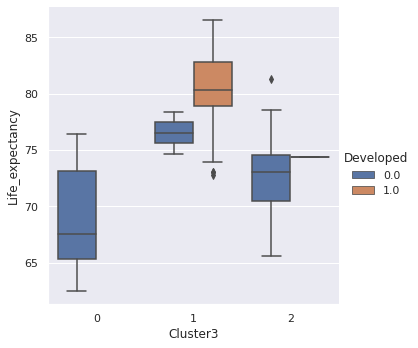

In [18]:
#Example: Comparing the distributions for life expectancy based on clustering, coloring with Developed-value
sns.catplot(data=dfLEA,x="Cluster3",  y="Life_expectancy", kind="box", hue='Developed')

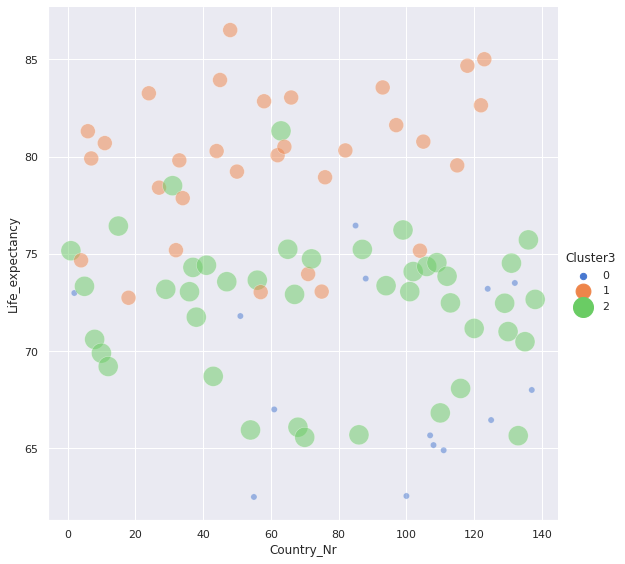

In [19]:
# # Plotting the values of life-expectancy of all the countries, coloring the clusters
sns.relplot(x="Country_Nr", y="Life_expectancy", hue="Cluster3", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=dfLEA)

Discussing the results:
- Cluster= 0 points are mainly in the lower range of life-expectancy and contain mainly developing countries.
- Cluster = 1 points contain highest average of life-expectancy and contains developed as well as developing countries.
- Cluster= 2 are in the middle range of the life-expectancy and contain mainly developing countries.

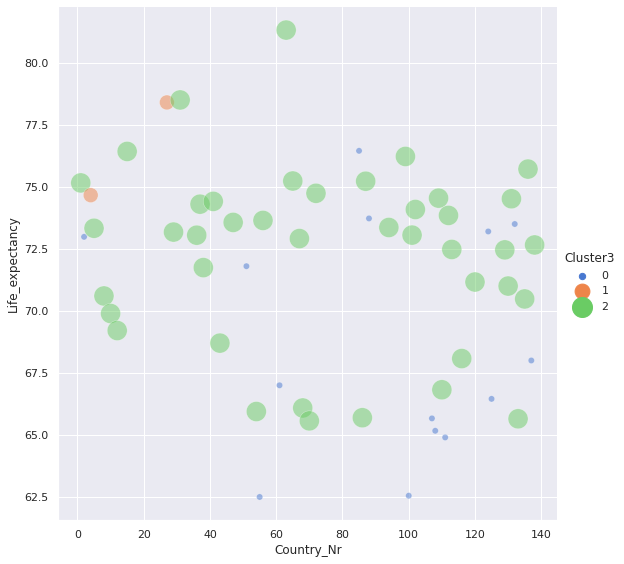

In [20]:
# Plotting the values of life-expectancy of developing countries, coloring the clusters
sns.relplot(x="Country_Nr", y="Life_expectancy", hue="Cluster3", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=dfLEA[dfLEA['Developed']==0])

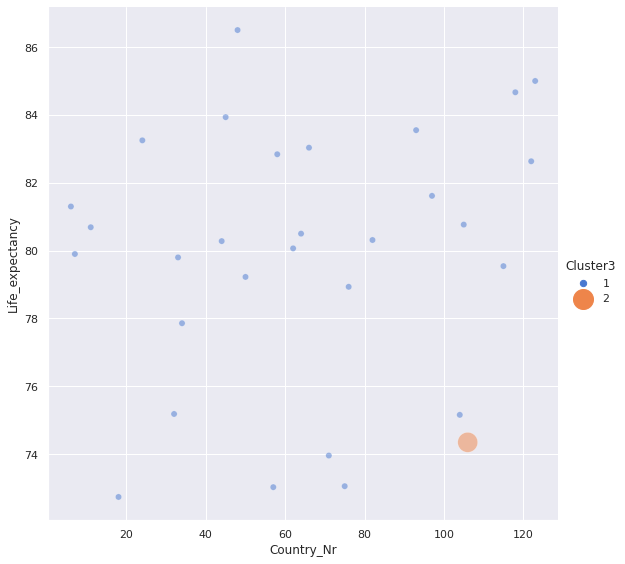

In [21]:
# Plotting the values of life-expectancy of developed countries, coloring the clusters
sns.relplot(x="Country_Nr", y="Life_expectancy", hue="Cluster3", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=dfLEA[dfLEA['Developed']==1])

Discussing the results:
- As already tested in the t-Test, there is a statistical significant difference in the life_expectancy between developing and developed countries.
- While developing countries mainly belong to cluster=0 and 2, developed countries seem to almost entirely belong to cluster=1.
- One important result of this clustering is that it seems to be able to separate 'developing' from 'developed' countries.

#### 3.2.2 Comparing clustering with all of the variables
Just like with life-expectancy, we can test all of the other variables to see if the clustering of 3 clusters match any of the single variables. For this we can plot all of the catplots.

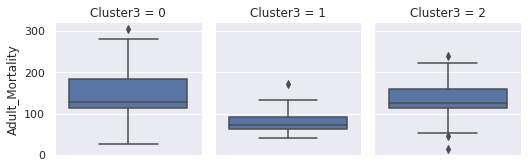

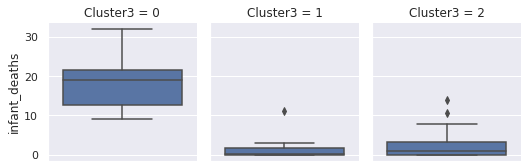

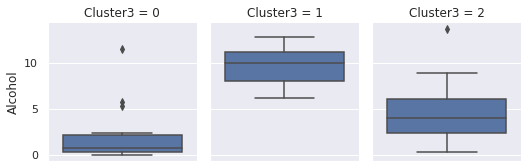

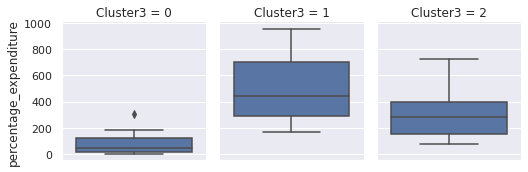

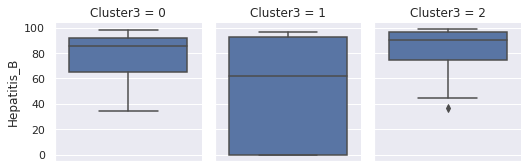

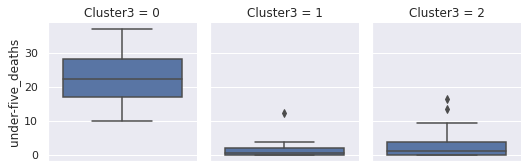

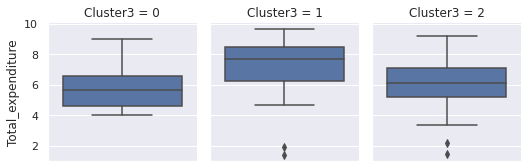

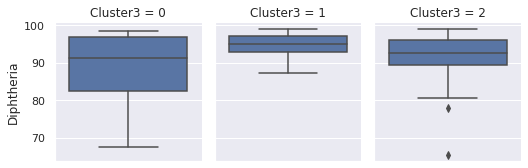

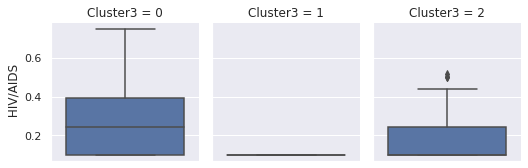

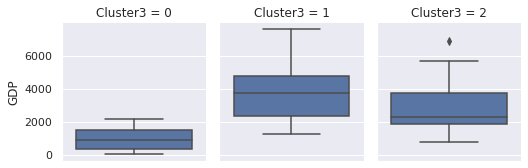

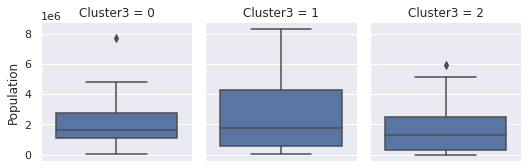

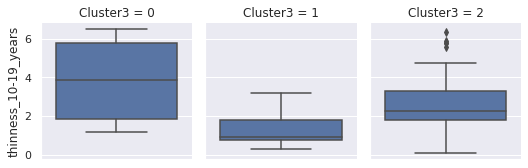

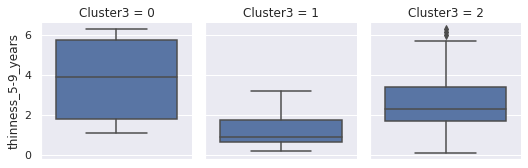

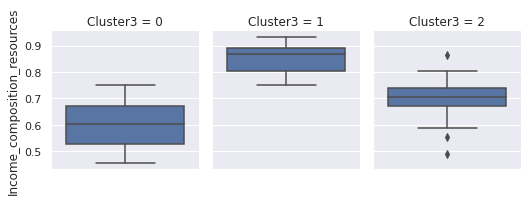

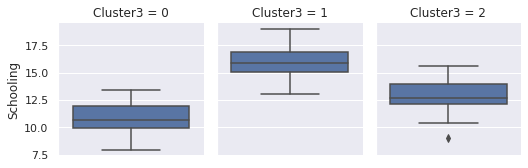

In [22]:
# Selecting 15 columns to check against Cluster3
columns=['Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'under-five_deaths', 'Total_expenditure', 'Diphtheria', ' HIV/AIDS',
       'GDP', 'Population', 'thinness_10-19_years', 'thinness_5-9_years',
       'Income_composition_resources', 'Schooling']

# problem with plotting catplots in subplots. 
# See: https://stackoverflow.com/questions/56788245/is-there-a-restriction-on-catplot-with-subplot
# did not get subplots to work with catplots, use col_wrap instead
sns.set_theme() #resetting the theme to default

for col in columns:
    #catplot of col against Cluster3
    sns.catplot(y=col, col="Cluster3", col_wrap=3,
                data=dfLEA,
                kind="box", height=2.5, aspect=1)


Discussing the results:
- Several of the single variables show distinct differences of the mean-values regarding the separation into the three clusters:
  - Alcohol
  - percentage_expenditure
  - GDP
  - thinness_10-19_years
  - thinness_5-9_years
  - Income_composition_resources
  - Schooling
    

##### 3.2.3 Plotting the scatterplots of all of the significant single values

In [23]:
columns=['Alcohol', 'percentage_expenditure', 'GDP','thinness_10-19_years', 'thinness_5-9_years',
       'Income_composition_resources', 'Schooling']


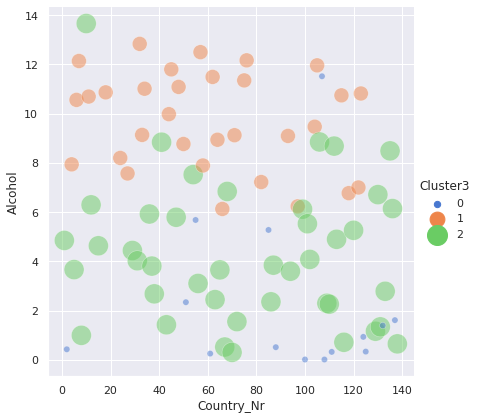

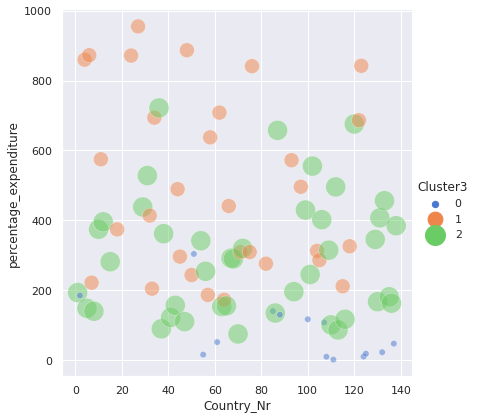

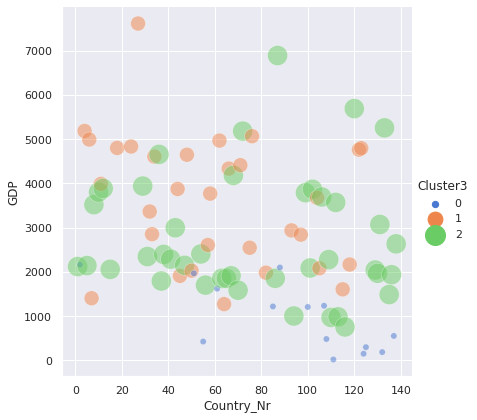

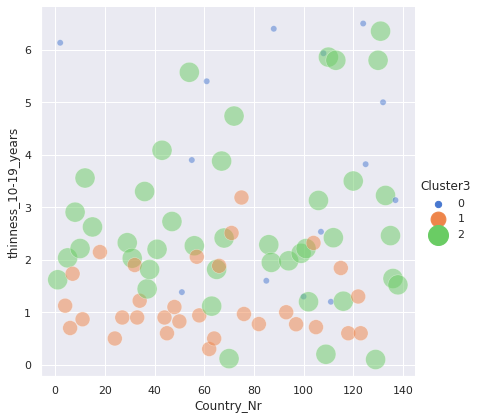

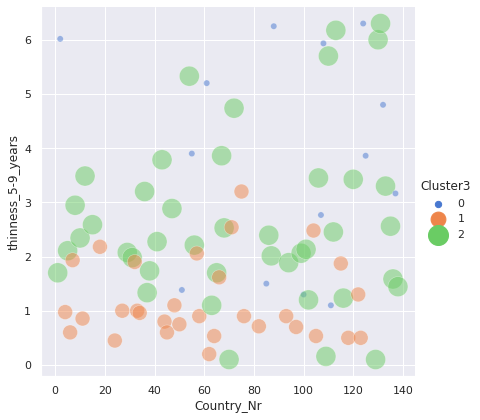

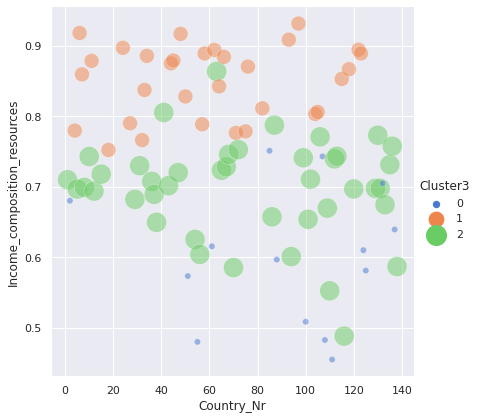

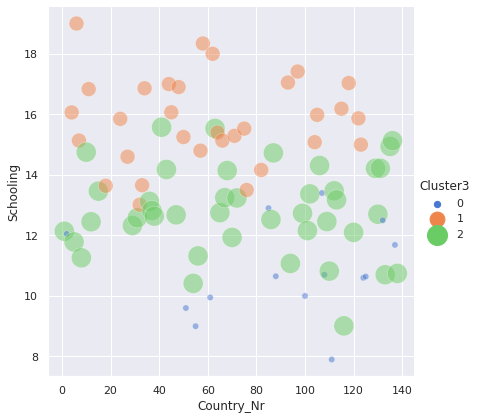

In [24]:
# # Plotting the values of Population of all the countries, coloring the clusters for Cluster3

for col in columns:
    sns.relplot(x="Country_Nr", y=col, hue="Cluster3", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dfLEA)

Discussing the results:
- We learned from before that cluster=1 are mainly the developed countries
- There is a clear pattern that the developed countries rank highest in 'Schooling', 'Income compostition resources', and 'Alcohol' and lowest in 'thinness'(5-19 years).

### 4 Dimensionality reduction
We have seen that more than one single variable matches with the clustering. This indicates that the clustering is based on several variables. Since we only can plot in two and sometimes three dimensions, we could only scatterplot one variable at the time.
Another way to visualize our clustering is to reduce the dimensonality of our dataset to two dimensions. One way to reduce dimensionality is with help of the Principal component analysis (PCA). PCA can be used to reduce dimensionality d of the dataset X to k (with k<=d) by:
- standardizing the d-dimensional dataset X
- constructing the covariance matrix and to compose it into its eigenvectors and eigenvalues
- selecting the k eigenvectors that correspond to the k largest eigenvalues
- constructing a projection matrix W from the k eigenvectors
- transforming the d-dimensionality input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

Scikit-learn implements a PCA-class that we will use.
For a proper handling of this function and more detailed description, see https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/


In [25]:
#Defining the dataset X to be used
X=dfLEA.loc[:,['Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'under-five_deaths', 'Total_expenditure', 'Diphtheria', ' HIV/AIDS',
       'GDP', 'Population', 'thinness_10-19_years', 'thinness_5-9_years',
       'Income_composition_resources', 'Schooling']]

In [26]:
dfLEA.shape

(87, 20)

In [27]:
X.shape

(87, 15)

In [29]:
X.head(3)

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,under-five_deaths,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_10-19_years,thinness_5-9_years,Income_composition_resources,Schooling
Country,,,,,,,,,,,,,,,
Albania,45.062500,0.687500,4.84875,193.259091,98.000000,0.9375,5.945625,98.062500,0.1,2119.726679,6.969116e+05,1.618750,1.700000,0.709875,12.1375
Algeria,113.833333,19.833333,0.42500,184.899824,45.833333,23.0000,4.041667,90.333333,0.1,2161.154005,2.798987e+06,6.133333,6.016667,0.680167,12.0500
Argentina,132.250000,11.000000,7.94000,859.803036,51.375000,12.3750,7.822500,90.500000,0.1,5185.838400,3.493547e+06,1.125000,0.975000,0.779625,16.0625


In [30]:
# PCA is sensitive to different scaling in the data. We therefore need to use a scaler first.
sc=StandardScaler()
X_std=sc.fit_transform(X)
# defining PCA
pca=PCA(n_components=2)
# carrying out the dimension reduction from d=15 to k=2 dimensions
X_pca=pca.fit_transform(X_std)

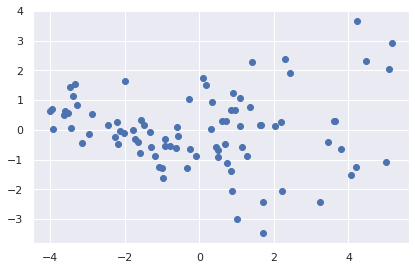

In [31]:
# Testing to plot the x and y values of the two dimensions
plt.scatter(X_pca[:,0],X_pca[:,1])

#### 4.1 Scatterplot of reduced dimensions
As the figure above illustrates, we succeeded in reducing the dimensions from 15 to 2. Since the index of the reduced data is still the same, we can add the information regarding our clusters and use it for coloring and labeling. We will do this for the earlier clustering of 2 and of 3 clusters.

In [32]:
# Preparing a dataframe that can be scatter plottet with coloring the clusters
dfX2=DataFrame(X_pca, index=X.index, columns=['x','y'])
dfX2.head(3)

,x,y
Country,,
Albania,-0.094374,-0.869494
Algeria,3.438687,-0.413876
Argentina,-1.997231,1.625324


In [33]:
#Adding the columns for the clusters Cluster2 and Cluster3
dfX2.loc[:,'Cluster2']=y_2f
dfX2.loc[:,'Cluster3']=dfLEA['Cluster3']
dfX2.head(2)

,x,y,Cluster2,Cluster3
Country,,,,
Albania,-0.094374,-0.869494,0,2
Algeria,3.438687,-0.413876,1,0


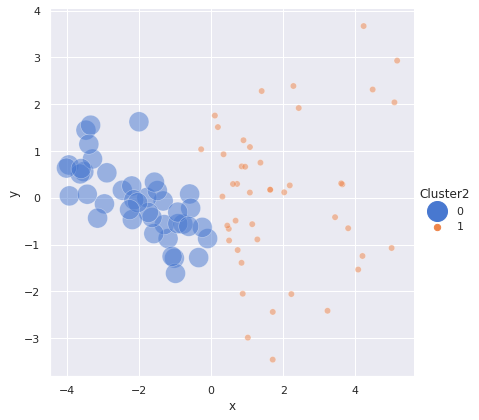

In [34]:
#Example: scatter plot two clusters in the reduced dimension of the dataset
sns.relplot(x="x", y="y", hue="Cluster2", size="Cluster2",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dfX2)

Discussion of the result:
- The two clusters are clearly seperated, with cluster 1 in the right half and cluster 0 in the left half of the plane.
- This also illustrates that the dimension reduction preserves the approximaty between data points

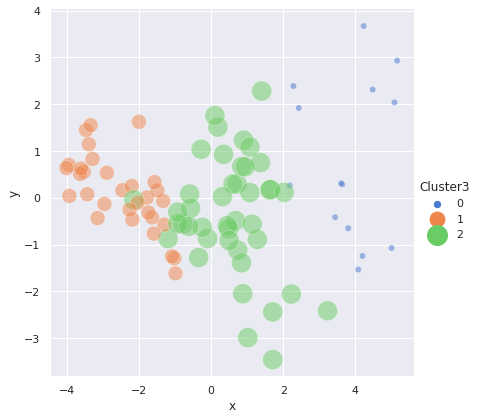

In [35]:
#Example: scatter plot three clusters in the reduced dimension of the dataset
sns.relplot(x="x", y="y", hue="Cluster3", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dfX2)

Discussion of the result:
- Cluster 1 and 2 from the clustering of 2 clusters are still present, but the area between the two clusters has become the third cluster.
    

In [36]:
# Adding life-expectancy to the data
dfX2.loc[:,'LE']=dfLEA['Life_expectancy']

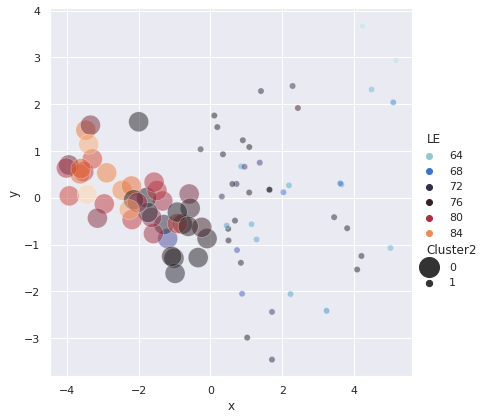

In [37]:
#Example: scatter plot two clusters in the reduced dimension of the dataset colored by life expectancy
sns.relplot(x="x", y="y", hue="LE", size="Cluster2",
            sizes=(40, 400), alpha=.5, palette="icefire",
            height=6, data=dfX2)

Discussion of the results:
- The coloring of the two clusters with the data from life expectancy shows that cluster 1 contains the data points with higher life expectancies.
- Cluster 2 contains mainly data points having life-expectancy values of 64 - 72 years

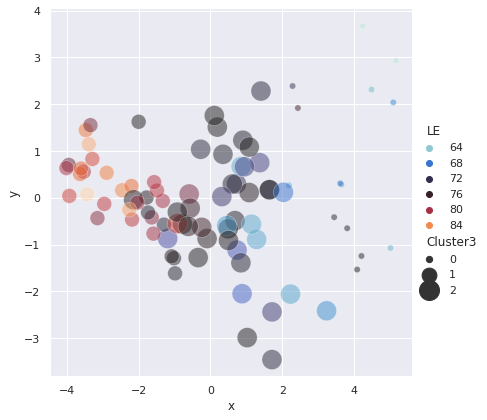

In [38]:
#Example: scatter plot three clusters in the reduced dimension of the dataset colored by life expectancy
sns.relplot(x="x", y="y", hue="LE", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="icefire",
            height=6, data=dfX2)

Discussion of the result:
- same as before, the third cluster does not add much more distinction as before, perhaps that somewhat more data points have lowest life expectancy values in cluster 2 than in 1. But highest values are still found in cluster 1.

#### 4.2 Identifying countries
We have learned from our clustering analysis that cluster 1 contains the highest values of life expectancies compared to cluster 0 or cluster 2.
By adding the labels to the points we can found out which countries that belong to which group and even how close they are to one another.

Text(0, 0.5, 'y')

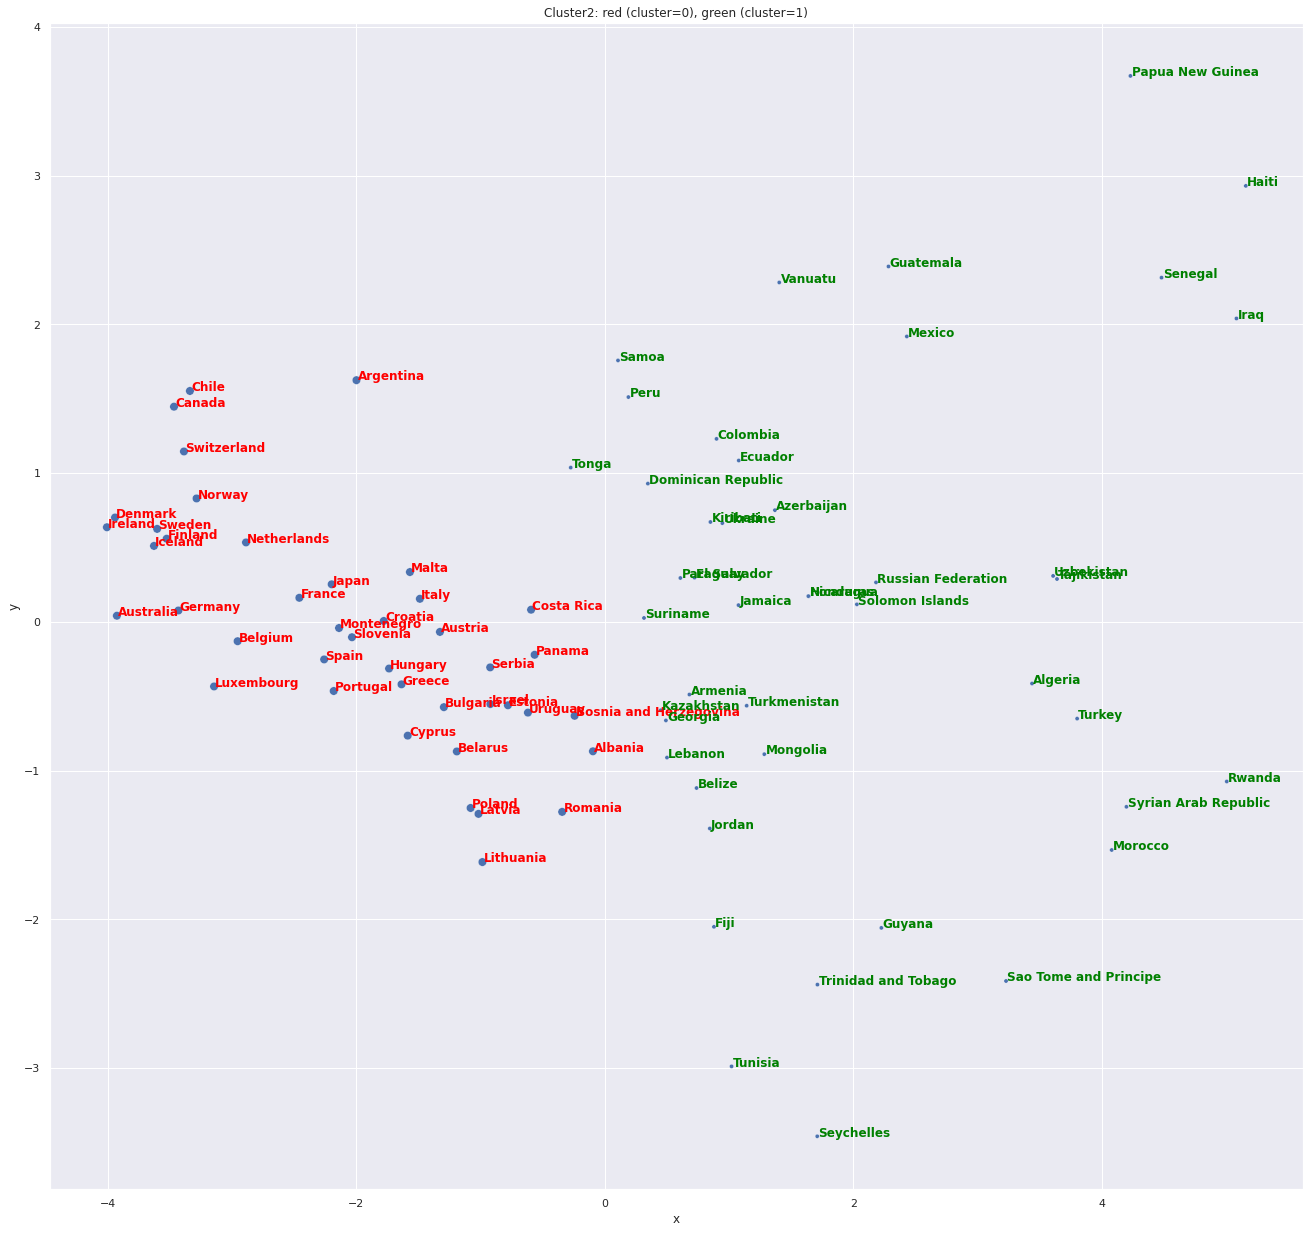

In [39]:
#Example: Labeling the countries belonging to cluster 0 and 1 in Cluster2
plt.figure(figsize=(20,20))
p1 = sns.scatterplot('x', # Horizontal axis
       'y', # Vertical axis
       data=dfX2, # Data source
       size = 'Cluster2',
       legend=False)  

for line in range(0,dfX2.shape[0]):
    #cluster2: 0=>red, 1=>green 
    c=dfX2.iloc[line,2]
    if c==0:
        p1.text(dfX2.iloc[line,0]+0.01, dfX2.iloc[line,1], 
                 dfX2.index[line], horizontalalignment='left', 
                 size='medium', color='red', weight='semibold')
    if c==1:
        p1.text(dfX2.iloc[line,0]+0.01, dfX2.iloc[line,1], 
                 dfX2.index[line], horizontalalignment='left', 
                 size='medium', color='green', weight='semibold')    
    

plt.title('Cluster2: red (cluster=0), green (cluster=1)')
# Set x-axis label
plt.xlabel('x')
# Set y-axis label
plt.ylabel('y')

Discussion of the results:
- red countries are the cluster with higher values of life expectancy 
- tehe approximation of the countries to one another illustrates subgroups of similar countries. One such example are the nordic countries Norway, Denmark, Sweden, Finland and Iceland.

Text(0, 0.5, 'y')

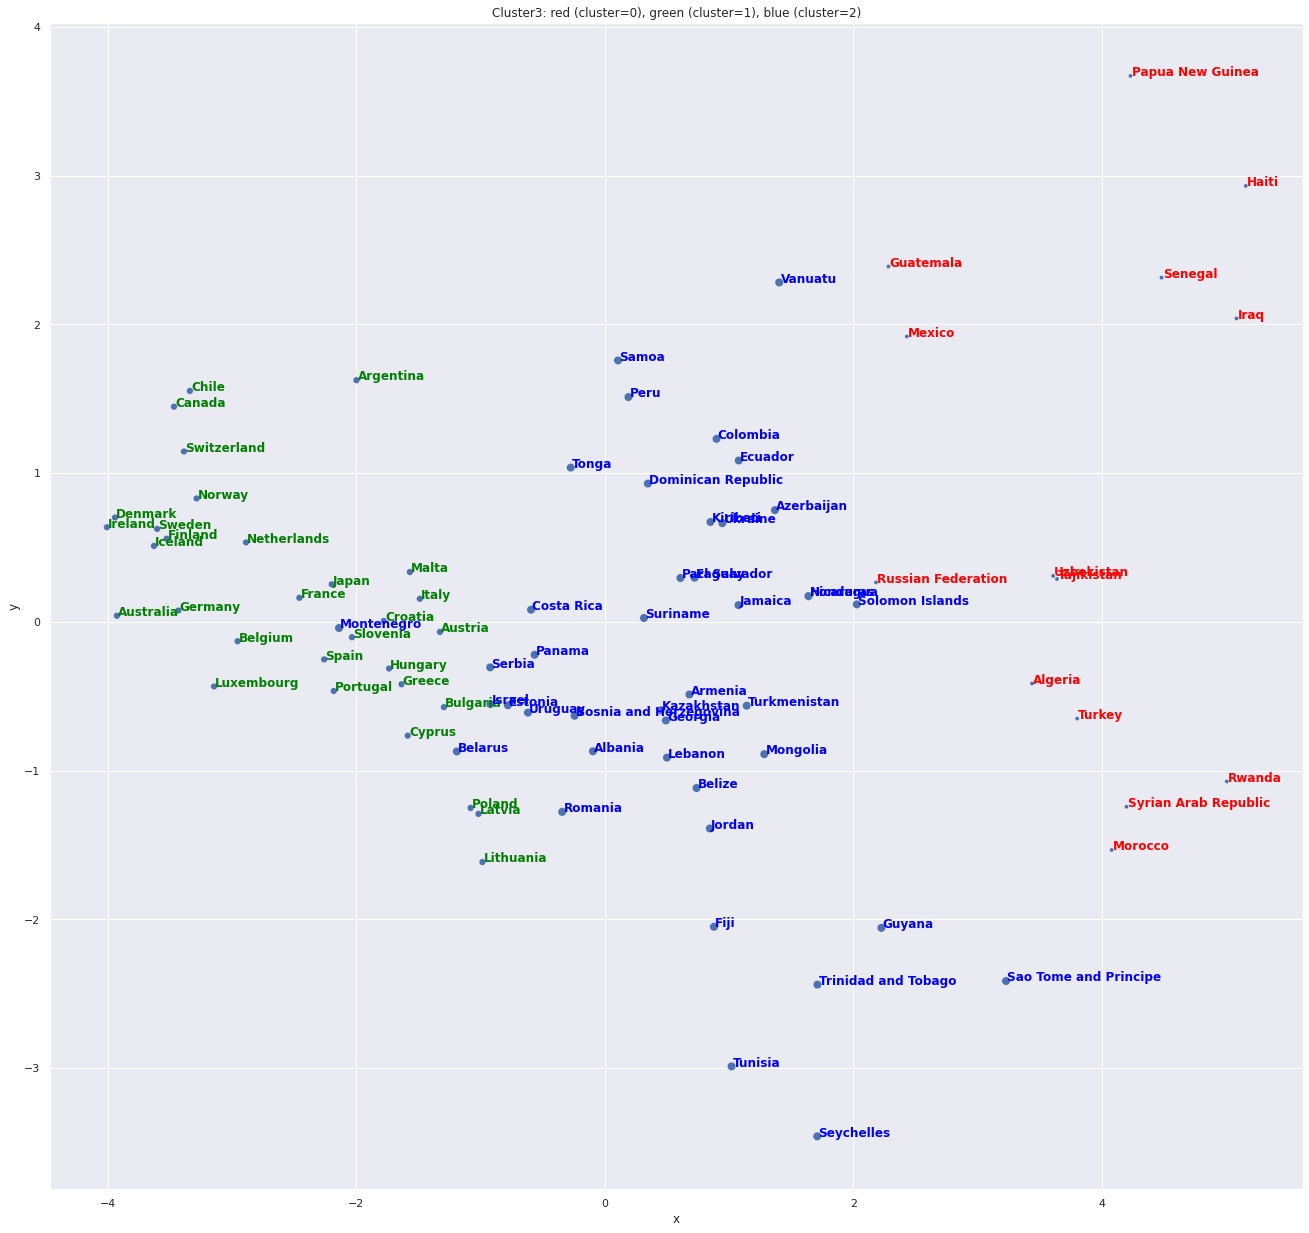

In [40]:
#Example: Labeling the countries belonging to cluster 0, 1 and 2 in Cluster3
plt.figure(figsize=(20,20))
p1 = sns.scatterplot('x', # Horizontal axis
       'y', # Vertical axis
       data=dfX2, # Data source
       size = 'Cluster3',
       legend=False)  

for line in range(0,dfX2.shape[0]):
    #cluster3: 0=>red, 1=>green, 2 =>blue 
    c=dfX2.iloc[line,3]
    if c==0:
        p1.text(dfX2.iloc[line,0]+0.01, dfX2.iloc[line,1], 
                 dfX2.index[line], horizontalalignment='left', 
                 size='medium', color='red', weight='semibold')
    if c==1:
        p1.text(dfX2.iloc[line,0]+0.01, dfX2.iloc[line,1], 
                 dfX2.index[line], horizontalalignment='left', 
                 size='medium', color='green', weight='semibold')
    if c==2:
        p1.text(dfX2.iloc[line,0]+0.01, dfX2.iloc[line,1], 
                 dfX2.index[line], horizontalalignment='left', 
                 size='medium', color='blue', weight='semibold') 
    

plt.title('Cluster3: red (cluster=0), green (cluster=1), blue (cluster=2)')
# Set x-axis label
plt.xlabel('x')
# Set y-axis label
plt.ylabel('y')

Discussion of the results:
- the larger group of developing countries has been seperated into two groups, colored in green and blue.
- it seems like that the more to the left a country appears in the map the higher its life expectancy
- it is unclear what the vertical axis stands for.

### 6. Saving the final dataset in excel
We have cleaned the data from unrealistic data and outliers and saved the result in the variable 'dfLE'. We then aggregated over the years and set the names of the countries to the index, which resulted in the variable 'dfLEA'. Finally, we reduced the dimension of this variable to 2 and added the numbers of the clusters from clustering with 2 and 3 clusters, as well as the values of the life-expectancy. This we saved in the variable 'dfX2'.


In [41]:
#Saving the final data in three different excel files 
#see: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-writer
#If you want to save new versions with the same name they will write over the old version.
#But be sure not to have the files open in Excel when you try to create a new version of the file.
dfLE.to_excel(outputFilePath +'dfLE.xlsx', sheet_name='dfLE')
dfLEA.to_excel(outputFilePath +'dfLEA.xlsx', sheet_name='dfLEA')
dfX2.to_excel(outputFilePath +'dfX2.xlsx', sheet_name='dfX2')
